In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Tubes/Dataset/Tomat"

/content/drive/MyDrive/Tubes/Dataset/Kentang


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory as imageFolder

In [ ]:
path = "/content/drive/MyDrive/Tubes/Dataset/Kentang"
train = imageFolder(path, subset="training",validation_split=0.2, seed = 123, image_size=(256, 256))
val =imageFolder(path, subset="validation",validation_split=0.2, seed = 123, image_size=(256, 256))

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [ ]:
class_names = train.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
class_names = ["Kentang - Early Blight", "Kentang - Late Blight", "Kentang - Healthy"]
class_names

['Kentang - Early Blight', 'Kentang - Late Blight', 'Kentang - Healthy']

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**VGG19**

In [ ]:
input_t = K.Input(shape=(256, 256, 3))
pretrained_model = K.applications.VGG19(include_top = False, weights = "imagenet", input_tensor = input_t)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
len(pretrained_model.layers)

22

In [ ]:
for layer in pretrained_model.layers[:18]:
  layer.trainable = False

In [ ]:
model = K.models.Sequential()
#Bagian Augmentation
model.add(K.layers.RandomRotation(0.5))
model.add(K.layers.RandomFlip("horizontal_and_vertical"))
#Transfer Learning
model.add(pretrained_model)
#Fully Connected Layer
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.2))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(3))

In [ ]:
opt = K.optimizers.SGD(learning_rate=0.0005)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=['accuracy'])

history = model.fit(train, epochs=20, validation_data=val)
model.save("/content/drive/MyDrive/Tubes/Potato/VGG19l.keras")

Epoch 1/20
75/75 [==============================] - 706s 8s/step - loss: 0.8327 - accuracy: 0.6404 - val_loss: 0.9478 - val_accuracy: 0.6683
Epoch 2/20
75/75 [==============================] - 20s 266ms/step - loss: 0.3900 - accuracy: 0.8425 - val_loss: 1.2653 - val_accuracy: 0.6933
Epoch 3/20
75/75 [==============================] - 21s 273ms/step - loss: 0.2644 - accuracy: 0.8992 - val_loss: 0.6884 - val_accuracy: 0.8000
Epoch 4/20
75/75 [==============================] - 21s 271ms/step - loss: 0.2118 - accuracy: 0.9225 - val_loss: 0.4391 - val_accuracy: 0.8483
Epoch 5/20
75/75 [==============================] - 20s 265ms/step - loss: 0.1783 - accuracy: 0.9367 - val_loss: 0.5826 - val_accuracy: 0.8150
Epoch 6/20
75/75 [==============================] - 21s 274ms/step - loss: 0.1593 - accuracy: 0.9383 - val_loss: 0.3830 - val_accuracy: 0.8683
Epoch 7/20
75/75 [==============================] - 20s 266ms/step - loss: 0.1446 - accuracy: 0.9467 - val_loss: 0.3306 - val_accuracy: 0.8850
E

In [ ]:
acc_vgg19 = history.history['accuracy']
val_acc_vgg19 = history.history['val_accuracy']
loss_vgg19 = history.history['loss']
val_loss_vgg19 = history.history['val_loss']

**ResNet50**

In [ ]:
pretrained_model2 = K.applications.ResNet50(include_top = False, weights = "imagenet", input_tensor = input_t)

94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
len(pretrained_model2.layers)

175

In [ ]:
for layer in pretrained_model2.layers[:150]:
  layer.trainable = False

In [ ]:
model = K.models.Sequential()
#Bagian Augmentation
model.add(K.layers.RandomRotation(0.5))
model.add(K.layers.RandomFlip("horizontal_and_vertical"))
#Transfer Learning
model.add(pretrained_model2)
#Fully Connected Layer
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.2))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(3))

In [ ]:
opt = K.optimizers.SGD(learning_rate=0.0005)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=['accuracy'])

history = model.fit(train, epochs=20, validation_data=val)
model.save("/content/drive/MyDrive/Tubes/Potato/ResNet50.keras")

Epoch 1/20
75/75 [==============================] - 28s 241ms/step - loss: 0.4668 - accuracy: 0.8179 - val_loss: 0.3169 - val_accuracy: 0.8717
Epoch 2/20
75/75 [==============================] - 16s 213ms/step - loss: 0.2309 - accuracy: 0.9121 - val_loss: 0.1844 - val_accuracy: 0.9267
Epoch 3/20
75/75 [==============================] - 16s 213ms/step - loss: 0.1690 - accuracy: 0.9325 - val_loss: 0.1440 - val_accuracy: 0.9433
Epoch 4/20
75/75 [==============================] - 16s 212ms/step - loss: 0.1318 - accuracy: 0.9554 - val_loss: 0.1347 - val_accuracy: 0.9517
Epoch 5/20
75/75 [==============================] - 16s 210ms/step - loss: 0.1143 - accuracy: 0.9583 - val_loss: 0.1181 - val_accuracy: 0.9550
Epoch 6/20
75/75 [==============================] - 16s 211ms/step - loss: 0.1134 - accuracy: 0.9596 - val_loss: 0.1095 - val_accuracy: 0.9533
Epoch 7/20
75/75 [==============================] - 19s 252ms/step - loss: 0.1006 - accuracy: 0.9625 - val_loss: 0.1038 - val_accuracy: 0.9517

In [ ]:
acc_resnet50 = history.history['accuracy']
val_acc_resnet50 = history.history['val_accuracy']
loss_resnet50 = history.history['loss']
val_loss_resnet50 = history.history['val_loss']

**inception_v3**

In [ ]:
pretrained_model3 = K.applications.InceptionV3(include_top = False, weights = "imagenet", input_tensor = input_t)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
len(pretrained_model3.layers)

311

In [ ]:
for layer in pretrained_model3.layers[:260]:
  layer.trainable = False
for layer in pretrained_model3.layers[260:]:
  layer.trainable = True

In [ ]:
model = K.models.Sequential()
#Bagian Augmentation
model.add(K.layers.RandomRotation(0.5))
model.add(K.layers.RandomFlip("horizontal_and_vertical"))
#Transfer Learning
model.add(pretrained_model3)
#Fully Connected Layer
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.2))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(3))

In [ ]:
opt = K.optimizers.SGD(learning_rate=0.0005)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=['accuracy'])

history = model.fit(train, epochs=20, validation_data=val)
model.save("/content/drive/MyDrive/Tubes/Potato/Inception_v3.keras")

Epoch 1/20
75/75 [==============================] - 21s 171ms/step - loss: 0.8696 - accuracy: 0.6371 - val_loss: 1.3890 - val_accuracy: 0.3500
Epoch 2/20
75/75 [==============================] - 12s 149ms/step - loss: 0.6744 - accuracy: 0.7192 - val_loss: 1.6687 - val_accuracy: 0.3250
Epoch 3/20
75/75 [==============================] - 12s 153ms/step - loss: 0.5654 - accuracy: 0.7850 - val_loss: 1.4791 - val_accuracy: 0.3250
Epoch 4/20
75/75 [==============================] - 11s 146ms/step - loss: 0.5392 - accuracy: 0.7837 - val_loss: 1.5040 - val_accuracy: 0.3250
Epoch 5/20
75/75 [==============================] - 11s 145ms/step - loss: 0.4581 - accuracy: 0.8204 - val_loss: 1.8235 - val_accuracy: 0.3250
Epoch 6/20
75/75 [==============================] - 12s 150ms/step - loss: 0.4844 - accuracy: 0.8171 - val_loss: 1.4830 - val_accuracy: 0.3267
Epoch 7/20
75/75 [==============================] - 12s 155ms/step - loss: 0.4684 - accuracy: 0.8096 - val_loss: 1.1283 - val_accuracy: 0.3933

In [ ]:
acc_inception_v3 = history.history['accuracy']
val_acc_inception_v3 = history.history['val_accuracy']
loss_inception_v3 = history.history['loss']
val_loss_inception_v3 = history.history['val_loss']

**inception ResNet V2**

In [ ]:
#pretrained_model4 = K.applications.InceptionResNetV2(include_top = False, weights = "imagenet", input_tensor = input_t)

In [ ]:
#len(pretrained_model4.layers)

In [ ]:
# for layer in pretrained_model4.layers[:720]:
#   layer.trainable = False
# for layer in pretrained_model4.layers[720:]:
#   layer.trainable = True

In [ ]:
# model = K.models.Sequential()
# #Bagian Augmentation
# model.add(K.layers.RandomRotation(0.5))
# model.add(K.layers.RandomFlip("horizontal_and_vertical"))
# #Transfer Learning
# model.add(pretrained_model4)
# #Fully Connected Layer
# model.add(K.layers.Flatten())
# model.add(K.layers.BatchNormalization())
# model.add(K.layers.Dropout(0.2))
# model.add(K.layers.Dense(128, activation='relu'))
# model.add(K.layers.BatchNormalization())
# model.add(K.layers.Dense(3))

In [ ]:
# opt = K.optimizers.SGD(learning_rate=0.005)
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=['accuracy'])

# history = model.fit(train, epochs=20, validation_data=val)
# model.save("/content/drive/MyDrive/Tubes/Potato/Inception_ResNet_v2.keras")

In [ ]:
# acc_inception_resnet_v2 = history.history['accuracy']
# val_acc_inception_resnet_v2 = history.history['val_accuracy']
# loss_inception_resnet_v2 = history.history['loss']
# val_loss_inception_resnet_v2 = history.history['val_loss']

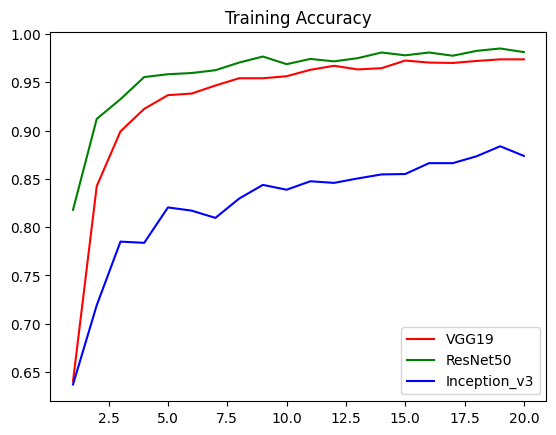

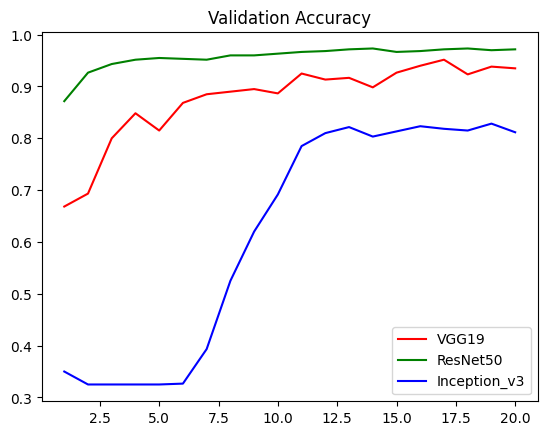

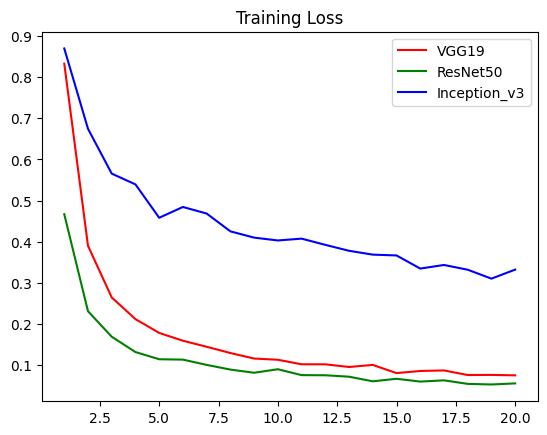

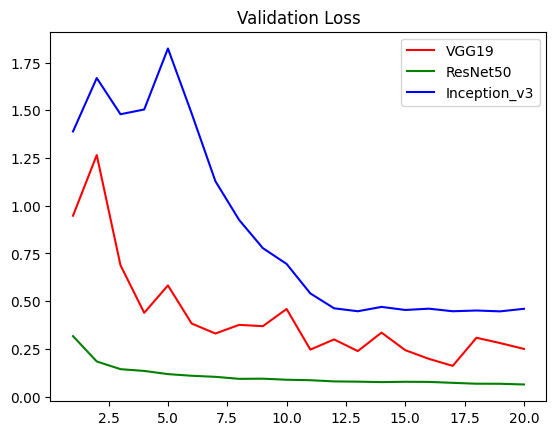

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(acc_vgg19)+1)

plt.plot(epochs, acc_vgg19, 'r', label='VGG19')
plt.plot(epochs, acc_resnet50, 'g', label='ResNet50')
plt.plot(epochs, acc_inception_v3, 'b', label='Inception_v3')
# plt.plot(epochs, acc_inception_resnet_v2, 'y', label='InceptionResNet_v2')
plt.title('Training Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, val_acc_vgg19, 'r', label='VGG19')
plt.plot(epochs, val_acc_resnet50, 'g', label='ResNet50')
plt.plot(epochs, val_acc_inception_v3, 'b', label='Inception_v3')
# plt.plot(epochs, val_acc_inception_resnet_v2, 'y', label='InceptionResNet_v2')
plt.title('Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss_vgg19, 'r', label='VGG19')
plt.plot(epochs, loss_resnet50, 'g', label='ResNet50')
plt.plot(epochs, loss_inception_v3, 'b', label='Inception_v3')
# plt.plot(epochs, loss_inception_resnet_v2, 'y', label='InceptionResNet_v2')
plt.title('Training Loss')
plt.legend()

plt.figure()
plt.plot(epochs, val_loss_vgg19, 'r', label='VGG19')
plt.plot(epochs, val_loss_resnet50, 'g', label='ResNet50')
plt.plot(epochs, val_loss_inception_v3, 'b', label='Inception_v3')
# plt.plot(epochs, val_loss_inception_resnet_v2, 'y', label='InceptionResNet_v2')
plt.title('Validation Loss')
plt.legend()

plt.show()